<b>random forest regressor</b> <br>
OOB Score: 0.9806250796856056 <br>
R-Squared on test: 0.9974039392381283<br>
MSE: 0.01903015436936935
   
   
OLS Linear Regression on cost per watt
R-Squared score = 0.937

OLS Linear Regression on weekly differences
OLS Regression Results
R-squared:	0.000


In [141]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [120]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
%reload_ext autoreload

In [196]:
%autoreload

In [8]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
3 of 11 |    Concatenating datasets together
4 of 11 |    Cleaning up column names
5 of 11 |    Sorting values by installation_date
6 of 11 |    Assigning installation_date as index
7 of 11 |    Refining to only RES customer_segment
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------------------------------------------------------------


## SHORTEND TIMELINE 

In [198]:
shortened_timeline()

,cost_per_watt
installation_date,
2002-01-06,12.935
2002-01-13,12.670
2002-01-20,12.110
2002-01-27,11.950
2002-02-03,11.820
...,...
2018-12-09,3.790
2018-12-16,3.850
2018-12-23,3.890


In [163]:
syw, s_lagg = shortened_timeline(df)[0], shortened_timeline(df)[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:13:52   Log-Likelihood:                -320.64
No. Observations:                 885   AIC:                             649.3
Df Residuals:                     881   BIC:                             668.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.035      0.676      0.4

In [168]:
compute_autocorrelation(s_lagg)

-0.3134774974809724

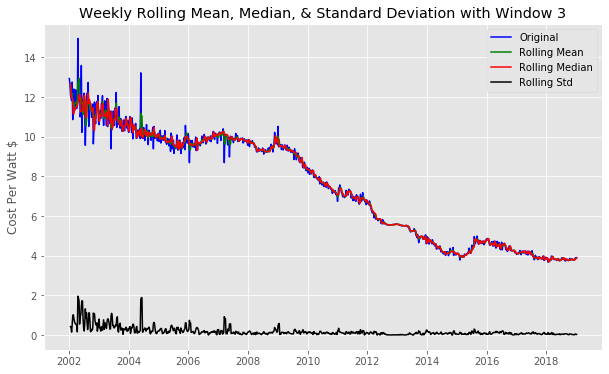

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [199]:
rolling_plot(syw)

test_stationarity(syw)

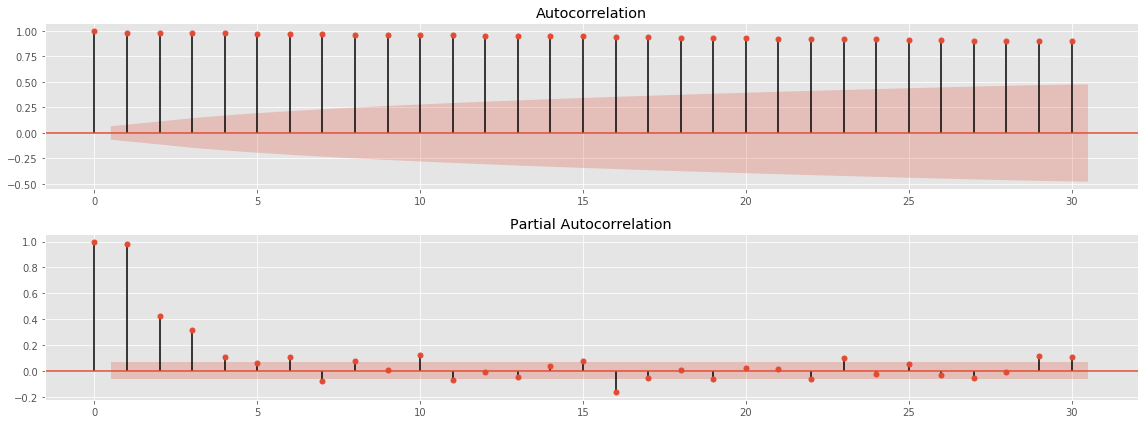

In [127]:
box_jenkins_plot(syw)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


,cost_per_watt
installation_date,
2002-01-06,NaN
2002-01-13,-0.265
2002-01-20,-0.560
2002-01-27,-0.160
2002-02-03,-0.130
...,...
2018-12-09,0.010
2018-12-16,0.060
2018-12-23,0.040


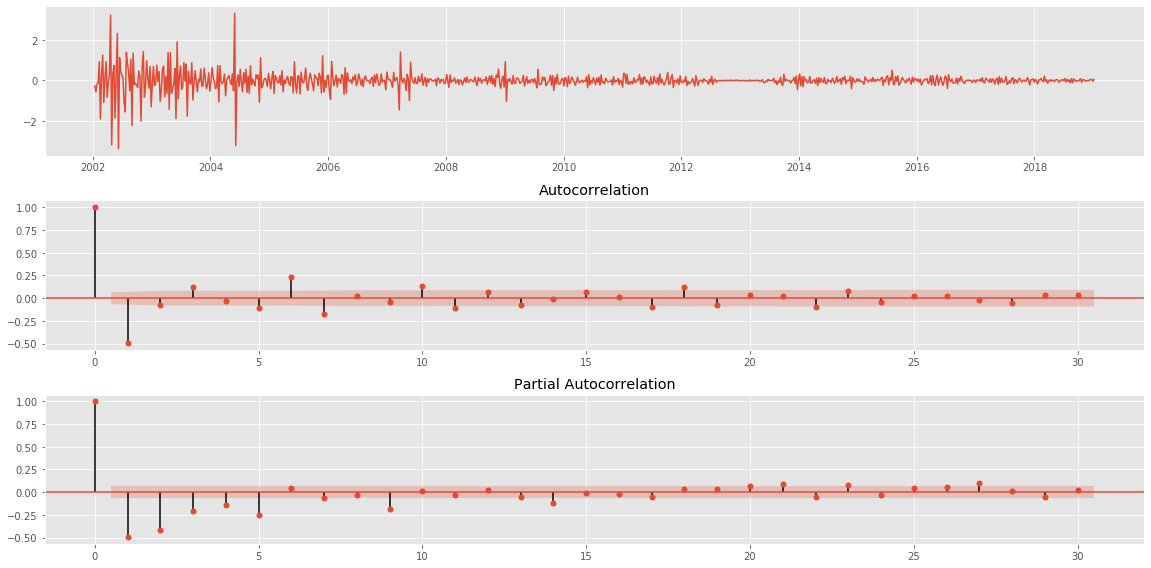

In [159]:
#shortened timeline 
get_differences(syw)

In [171]:
w_diff = weekly_differences.dropna()

In [164]:
s_lagg_cost = create_lag(weekly_differences)

In [169]:
compute_autocorrelation(s_lagg_cost)

-0.7809776370435969

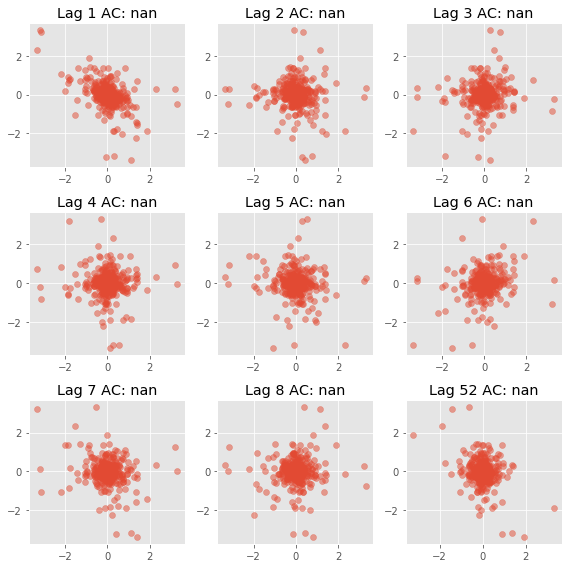

In [172]:
plot_ac_scat(w_diff)

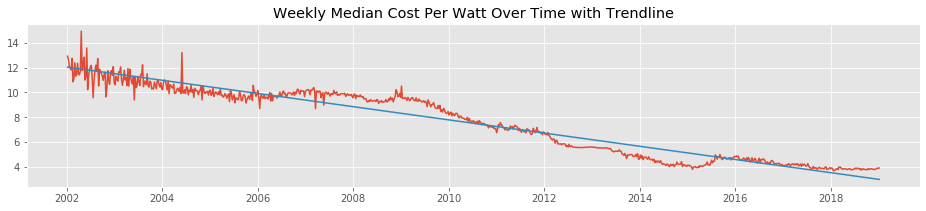

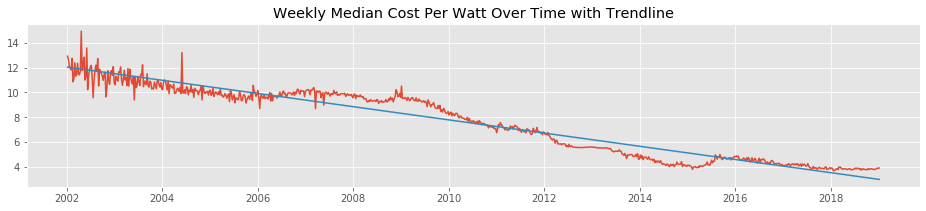

In [200]:
s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

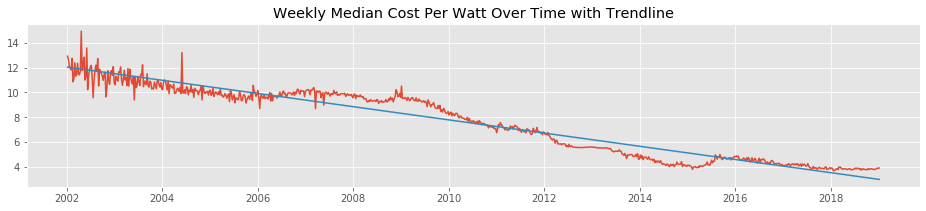

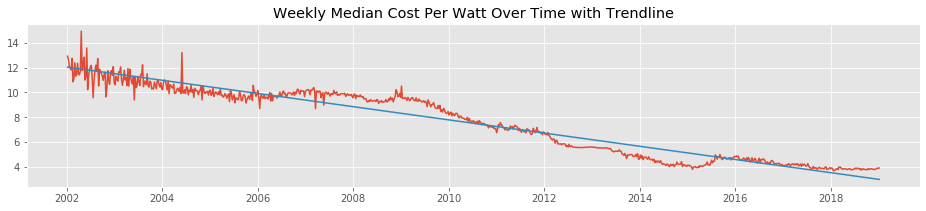

In [180]:
s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

In [187]:
print('r squared for linear model on price', s_linear_model.rsquared)
print('mse total for linear model on price', s_linear_model.mse_total)
print('r squared for linear model on price', s_linear_model.summary)      

r squared for linear model on price 0.9368391801743174
mse total for linear model on price 7.338660621388017
r squared for linear model on price <bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1774d0890>>


In [ ]:
OLS linear

In [189]:
s_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_watt   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:31:04   Log-Likelihood:                -918.12
No. Observations:                 888   AIC:                             1840.
Df Residuals:                     886   BIC:                             1850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0522      0.046    263.390      0.000      11.962      12.142
x1            -0.0102   8.92e-05   -114.637      0.000      -0.010      -0.010
==============================================================================
Omnibus:                        4.833   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.901
Skew:                           0.179   Prob(JB):                       0.0862
Kurtosis:                       2.932   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
diff_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_watt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05783
Date:                Fri, 13 Mar 2020   Prob (F-statistic):              0.810
Time:                        15:33:00   Log-Likelihood:                -530.05
No. Observations:                 887   AIC:                             1064.
Df Residuals:                     885   BIC:                             1074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0164      0.030     -0.553      0.581      -0.074       0.042
x1          1.389e-05   5.77e-05      0.240      0.810   -9.94e-05       0.000
==============================================================================
Omnibus:                      274.843   Durbin-Watson:                   2.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15107.376
Skew:                          -0.554   Prob(JB):                         0.00
Kurtosis:                      23.188   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

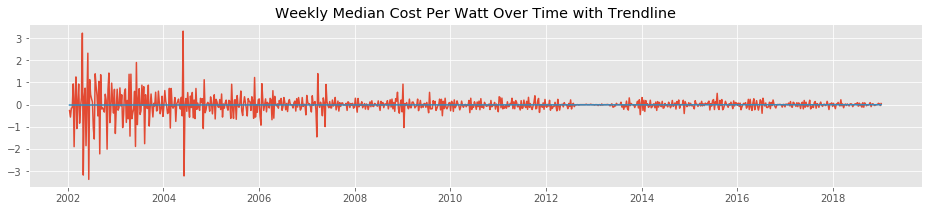

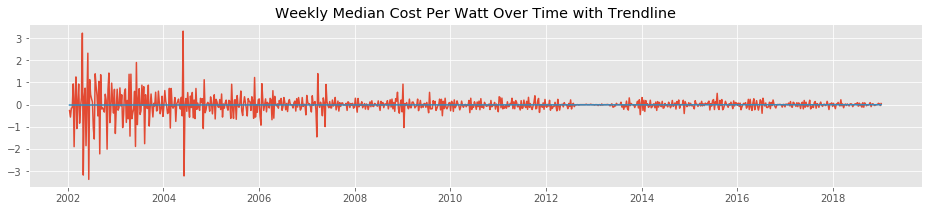

In [191]:
diff_linear_model, diff_linear_trend = linear_model_trend(w_diff)[0], linear_model_trend(w_diff)[1]

Even though test statistic and critical value are not near equal, we only care about pvalue which determines if we can reject the null hypothesis of the ADF test. 

In [ ]:
looking at the lags involved

In [ ]:
d = weekly differences
p = pational autocorrelation
q = autocorrelation

In [47]:
wd = np.array(weekly_differences)
sywa = np.array(syw)

In [72]:
auto_arima(wd[1:]).order

(4, 0, 3)

In [197]:
random_forest_model(syw)

OOB Score: 0.9806250796856056
r2 score on test: 0.9974039392381283
MSE: 0.01903015436936935
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] RFR__max_depth=5, RFR__n_estimators=5 ...........................
[CV] ............ RFR__max_depth=5, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=5 ...........................
[CV] ............ RFR__max_depth=5, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=5 ...........................
[CV] ............ RFR__max_depth=5, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=10 ..........................
[CV] ........... RFR__max_depth=5, RFR__n_estimators=10, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=10 ..........................
[CV] ........... RFR__max_depth=5, RFR__n_estimators=10, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=10 ..........................
[CV] ........... RFR__max_depth=5, RFR__n_estimators=10, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... RFR__max_depth=5, RFR__n_estimators=20, total=   0.0s
[CV] RFR__max_depth=5, RFR__n_estimators=20 ..........................
[CV] ........... RFR__max_depth=5, RFR__n_estimators=20, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=5 ..........................
[CV] ........... RFR__max_depth=10, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=5 ..........................
[CV] ........... RFR__max_depth=10, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=5 ..........................
[CV] ........... RFR__max_depth=10, RFR__n_estimators=5, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=10 .........................
[CV] .......... RFR__max_depth=10, RFR__n_estimators=10, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=10 .........................
[CV] .......... RFR__max_depth=10, RFR__n_estimators=10, total=   0.0s
[CV] RFR__max_depth=10, RFR__n_estimators=10 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


{'mean_fit_time': array([0.00902502, 0.01227204, 0.01474245, 0.02096232, 0.008346  ,
        0.01131662, 0.01849532, 0.02603428, 0.00638739, 0.01309896,
        0.01762295, 0.02333673, 0.00654642, 0.01172678, 0.02030969,
        0.02441462]),
 'std_fit_time': array([8.70770332e-04, 1.39005692e-03, 8.24331639e-05, 1.30048195e-03,
        6.47170017e-04, 1.20709254e-04, 1.51242217e-03, 1.53693205e-03,
        1.69243869e-04, 4.71576882e-04, 8.53429442e-04, 1.84029730e-03,
        1.28229059e-04, 1.19323887e-04, 2.84950306e-03, 2.11684032e-03]),
 'mean_score_time': array([0.00216921, 0.00185331, 0.00181635, 0.00228429, 0.00180093,
        0.00170366, 0.00239507, 0.00313663, 0.00144887, 0.00255179,
        0.00271694, 0.002467  , 0.00147986, 0.001755  , 0.00302021,
        0.0024728 ]),
 'std_score_time': array([2.88349790e-04, 2.03192723e-04, 2.11681448e-05, 2.16803738e-04,
        9.22767858e-05, 7.56037140e-06, 3.55663272e-04, 1.04391084e-03,
        3.10499964e-05, 8.91523359e-04, 8.42